# **MINST Data**

---
---

## **1. Imports**

In [289]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pprint import pprint
from PIL import Image
sns.set_style('whitegrid')

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

---

## **2. Load and prepare the data**

In [277]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

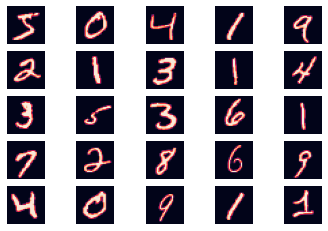

In [278]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i])
    plt.axis('off')

4

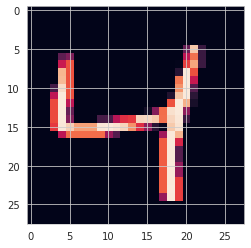

In [279]:
plt.imshow(xtrain[2]),
ytrain[2]

+ extract a subset of 1000 training/test data points from the MNIST dataset

+ train a conventional supervised learning model

+ calculate the training and test score as a baseline.

In [280]:
# extract a subset of 1000 training/test data points from the MNIST dataset
xtrain=xtrain[:1000]
ytrain=ytrain[:1000]
xtest=xtest[:1000]
ytest=ytest[:1000]

In [281]:
#Flatten Train Data
x_train= xtrain[:].reshape(1000,-1)

In [282]:
ytrain.shape , x_train.shape

((1000,), (1000, 784))

## **3. Train an ANN**

### **3.1 Prepare input data**

In [286]:
# One hot encoding the y-values
keras.utils.to_categorical(ytrain[2])

array([0., 0., 0., 0., 1.], dtype=float32)

In [287]:
keras.utils.to_categorical(ytrain[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### **3.2 Initiating ANN model**

In [308]:
# initialize model
K.clear_session()
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Dense(units=200,activation=keras.activations.relu, name='hidden_layer1'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(units=84, activation=keras.activations.relu, name='hidden_layer2'))         
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))          


model.add(keras.layers.Dense(units=40, activation=keras.activations.relu, name='hidden_layer3'))
model.add(keras.layers.BatchNormalization())


model.add(keras.layers.Dense(units=10, # 10 categories, one of which our findings will be classified as
                            activation=keras.activations.softmax, #sigmoid can be used but softmax gives results that sum to 100!
                            name='output_layer'))




In [309]:
# compile
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [310]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 84)                1

In [311]:
#callback = EarlyStopping(monitor='val_loss', patience=10)
# train the model
callback = EarlyStopping(monitor='val_loss',min_delta=0.001,verbose=0,mode="min", patience=5, )


history = model.fit(xtrain,
                keras.utils.to_categorical(ytrain),
                epochs = 100,
                batch_size = 512,
                validation_split=0.2,
                callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 2s 275ms/step - loss: 2.9168 - accuracy: 0.1037 - val_loss: 9.0950 - val_accuracy: 0.1000
Epoch 2/100
2/2 [==============================] - 0s 73ms/step - loss: 2.5402 - accuracy: 0.1488 - val_loss: 6.4764 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 79ms/step - loss: 2.2732 - accuracy: 0.2212 - val_loss: 5.2359 - val_accuracy: 0.1750
Epoch 4/100
2/2 [==============================] - 0s 76ms/step - loss: 2.0170 - accuracy: 0.2937 - val_loss: 4.4940 - val_accuracy: 0.2150
Epoch 5/100
2/2 [==============================] - 0s 73ms/step - loss: 1.8589 - accuracy: 0.3913 - val_loss: 3.9656 - val_accuracy: 0.2800
Epoch 6/100
2/2 [==============================] - 0s 63ms/step - loss: 1.7282 - accuracy: 0.4263 - val_loss: 3.5632 - val_accuracy: 0.3050
Epoch 7/100
2/2 [==============================] - 0s 75ms/step - loss: 1.5929 - accuracy: 0.4712 - val_loss: 3.2516 - val_accuracy: 0.3350
Epoch 8/100
2/2 [==

In [315]:
# evaluate the model 
model.evaluate(x=xtest, y=keras.utils.to_categorical(ytest))

32/32 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8370


[0.560076117515564, 0.8370000123977661]

In [316]:
# evaluate the model 
model.evaluate(x=xtrain, y=keras.utils.to_categorical(ytrain))

32/32 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9540


[0.21031397581100464, 0.9539999961853027]

<AxesSubplot:>

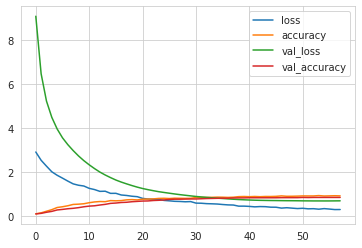

In [313]:
# Plotting loss and accuracy of our model
pd.DataFrame(history.history).plot()

### **3.3 Predicting results**

In [148]:
ypred = model.predict(xtest)

1

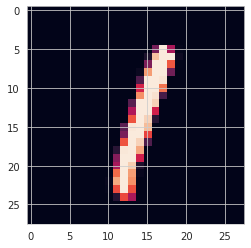

In [178]:
plt.imshow(xtest[5]) ,
np.argmax(ypred,axis=1)[5]

In [176]:
ypred = model.predict(xtest)
np.argmax(ypred,axis=1)

array([7, 2, 1, 0, 4, 1, 4, 6, 4, 9, 0, 6, 9, 0, 1, 3, 9, 7, 2, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       5, 5, 8, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9,
       2, 4, 3, 0, 3, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 8, 3, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6,
       5, 2, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 8, 1, 4, 9, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 4, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       9, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 7, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 7, 2, 2, 4, 1, 5, 8,
       0, 7, 2, 6, 0, 6, 4, 2, 9, 1, 9, 5, 7, 3, 2, 8, 2, 6, 8, 5, 7, 7,
       3, 1, 8, 1, 5, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 8, 5, 9, 2,
       6, 4, 1, 5, 4, 2, 9, 2, 0, 9, 0, 0, 2, 8, 6,

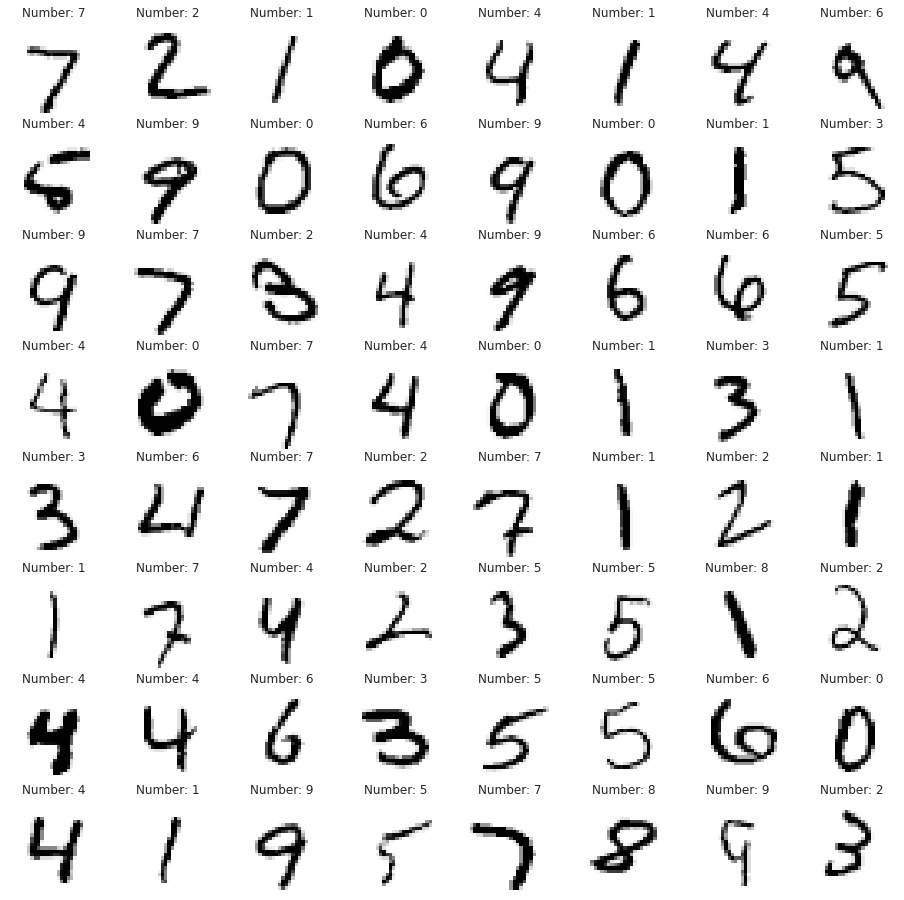

In [190]:
# plot the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8, 8, i+1,title=f'Number: {np.argmax(ypred,axis=1)[i]}')
    plt.imshow(xtest[i], cmap=plt.cm.Greys)
    plt.axis('off')

---
---

## **4. Train an CNN**

### **4.1 Prepare input data**

In [191]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [192]:
#add to xtrain and xtest a new axis for the color channel and rescale them to the intervall [0,1]
# add new axis and rescale to [0,1]
Xtrain = (xtrain[:,:,:,np.newaxis]/np.max(xtrain)).copy()
Xtest = (xtest.reshape(10000, 28, 28, 1)/np.max(xtest)).copy() # two ways of doing the same things

In [201]:
# from number to categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [194]:
Xtrain.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

### **4.2 Initializing CNN model**

In [206]:
K.clear_session()
regul = keras.models.Sequential()

#Conv layer 1&2
regul.add(keras.layers.Conv2D(6, 5, strides=(1, 1),activation='relu', input_shape=(28, 28, 1)))

regul.add(keras.layers.Dropout(0.2))

regul.add(keras.layers.BatchNormalization())

regul.add(keras.layers.Conv2D(16, 5, strides=(1, 1), activation='relu'))
   
regul.add(keras.layers.Dropout(0.5))

regul.add(keras.layers.BatchNormalization())
    
regul.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid', data_format=None))


#Conv layer 3&4

regul.add(keras.layers.Conv2D(32, 5, strides=(1, 1), activation='relu'))

regul.add(keras.layers.Dropout(0.5))

regul.add(keras.layers.BatchNormalization())

regul.add(keras.layers.Conv2D(64, 5, strides=(1, 1), activation='relu'))

regul.add(keras.layers.Dropout(0.5))

regul.add(keras.layers.BatchNormalization())

regul.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid', data_format=None))


#flattening

regul.add(keras.layers.Flatten())

#Dense layer 1
          
regul.add(keras.layers.Dense( 40, activation='relu'))

regul.add(keras.layers.Dropout(0.5))

regul.add(keras.layers.BatchNormalization())

#Dense layer 2

regul.add(keras.layers.Dense( 20, activation='relu'))


regul.add(keras.layers.BatchNormalization())



#output layer 

regul.add(keras.layers.Dense(units=10, # 10 categories, one of which our findings will be classified as
                            activation=keras.activations.softmax, #sigmoid can be used but softmax gives results that sum to 100!
                            name='output_layer'))

    

In [207]:
# build the computation graph
from tensorflow import keras

regul.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [208]:
# print all layers
regul.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 6)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 6)         24        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        2416      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0

In [209]:
Xtrain.shape, ytrain.shape

((60000, 28, 28, 1), (60000, 10))

In [210]:
# train the model
callback = EarlyStopping(monitor='val_loss', patience=5)

history_reg = regul.fit(Xtrain,
                ytrain,
                epochs = 100,
                batch_size = 512,
                validation_split=0.2,
                callbacks=[callback])


Epoch 1/100
94/94 [==============================] - 59s 606ms/step - loss: 1.6156 - accuracy: 0.4670 - val_loss: 2.0338 - val_accuracy: 0.1321
Epoch 2/100
94/94 [==============================] - 61s 646ms/step - loss: 0.7508 - accuracy: 0.7906 - val_loss: 1.7314 - val_accuracy: 0.3171
Epoch 3/100
94/94 [==============================] - 77s 820ms/step - loss: 0.4334 - accuracy: 0.8842 - val_loss: 0.8232 - val_accuracy: 0.8031
Epoch 4/100
94/94 [==============================] - 72s 763ms/step - loss: 0.3063 - accuracy: 0.9189 - val_loss: 0.3451 - val_accuracy: 0.9401
Epoch 5/100
94/94 [==============================] - 77s 820ms/step - loss: 0.2445 - accuracy: 0.9356 - val_loss: 0.2158 - val_accuracy: 0.9629
Epoch 6/100
94/94 [==============================] - 63s 670ms/step - loss: 0.2067 - accuracy: 0.9452 - val_loss: 0.1629 - val_accuracy: 0.9707
Epoch 7/100
94/94 [==============================] - 63s 671ms/step - loss: 0.1773 - accuracy: 0.9540 - val_loss: 0.1097 - val_accuracy:

KeyboardInterrupt: 

In [211]:
# evaluate the model 
regul.evaluate(x=Xtest, y=ytest)

313/313 [==============================] - 7s 23ms/step - loss: 0.0268 - accuracy: 0.9927


[0.026821572333574295, 0.9926999807357788]

In [212]:
# evaluate the model 
regul.evaluate(x=Xtrain, y=ytrain)

1875/1875 [==============================] - 30s 16ms/step - loss: 0.0233 - accuracy: 0.9942


[0.023328546434640884, 0.994183361530304]

In [213]:
# Plotting loss and accuracy of our model
pd.DataFrame(history_reg.history).plot()

NameError: name 'history_reg' is not defined

In [214]:

#save model
regul.save("model_number.h5")

---

### **4.3 Predicting results**

In [217]:
ypred_cnn = regul.predict(Xtest)
#np.argmax(ypred,axis=1)

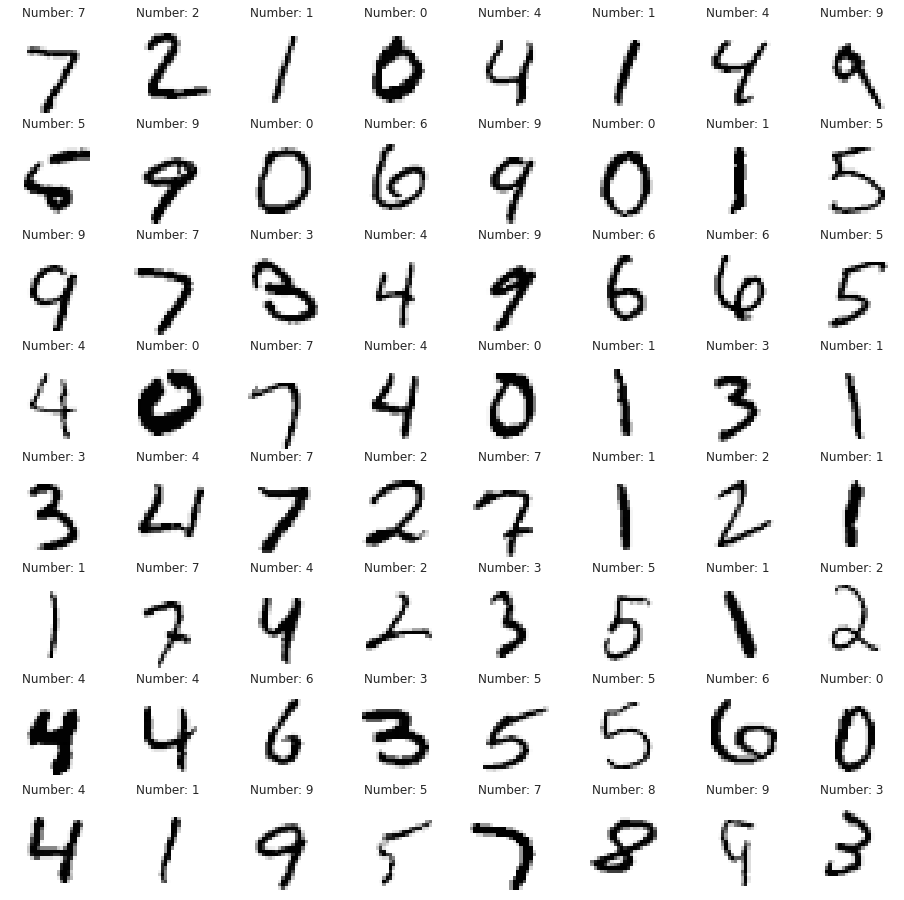

In [219]:
# plot the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8, 8, i+1,title=f'Number: {np.argmax(ypred_cnn,axis=1)[i]}')
    plt.imshow(xtest[i], cmap=plt.cm.Greys)
    plt.axis('off')

---

### **4.4 Calculate the confusion matrix**

In [220]:
# transform array in the corresponding digit
ypred_cnn_heat = np.argmax(ypred_cnn,axis=1)
ytest_heat = np.argmax(ytest,axis=1)

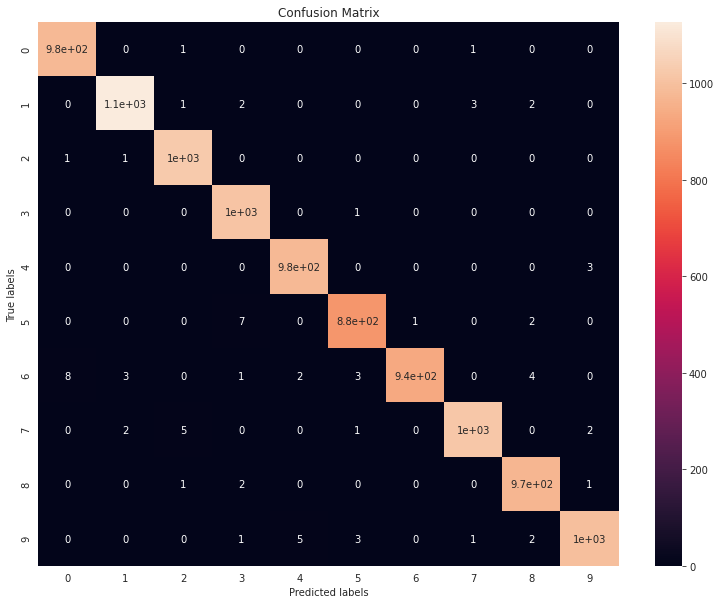

In [223]:
#print confusion matrix
fig = plt.figure(figsize=(13, 10))
cm = confusion_matrix(ytest_heat, ypred_cnn_heat)
# print(cm)
    
#plot the heatmap
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

---
---

## **5. Pretrained Networks**

### **5.1 Load and Prepare Data**

In [294]:
#Load  pictures
im = image.load_img('glasses.jpg',target_size=(224, 224))
im = im.rotate(-90)

In [295]:
im2 = image.load_img('glas.jpg',target_size=(224, 224))
im2 = im2.rotate(-90)

In [296]:
im3 = image.load_img('plant.jpg',target_size=(224, 224))
im3 = im3.rotate(-90)

In [297]:
# save as array and prepcrosess image
a = np.array(im)
a = preprocess_input(a)
b = np.array(im2)
b = preprocess_input(b)
c = np.array(im3)
c = preprocess_input(c)

In [298]:
#Check shape and data type
a.shape, a.dtype

((224, 224, 3), dtype('float32'))

In [299]:
# Initiate the MobuleNet Module
m = MobileNetV2(weights='imagenet', include_top=True)
m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [300]:
m.compile(optimizer='rmsprop', loss='categorical_crossentropy',
           metrics=['accuracy'])

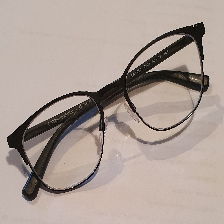

In [301]:
im

In [307]:
# predict the image
a = a.reshape(1, 224, 224, 3)
p = m.predict(a)
pprint(decode_predictions(p, 10))

[[('n03803284', 'muzzle', 0.24062869),
  ('n04133789', 'sandal', 0.20336793),
  ('n04579432', 'whistle', 0.054630995),
  ('n04355933', 'sunglass', 0.050933026),
  ('n04356056', 'sunglasses', 0.035182603),
  ('n02865351', 'bolo_tie', 0.027361333),
  ('n03868863', 'oxygen_mask', 0.015775796),
  ('n04039381', 'racket', 0.01568677),
  ('n03584829', 'iron', 0.0130517),
  ('n02979186', 'cassette_player', 0.011337248)]]


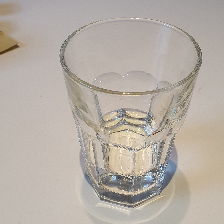

In [303]:
im2

In [304]:
# predict the image
b = b.reshape(1, 224, 224, 3)
p = m.predict(b)
pprint(decode_predictions(p, 10))

[[('n03443371', 'goblet', 0.44094387),
  ('n07930864', 'cup', 0.100557335),
  ('n03733805', 'measuring_cup', 0.07390475),
  ('n04522168', 'vase', 0.059497003),
  ('n02823750', 'beer_glass', 0.05754045),
  ('n02815834', 'beaker', 0.037905507),
  ('n02909870', 'bucket', 0.03613774),
  ('n03786901', 'mortar', 0.016501384),
  ('n03062245', 'cocktail_shaker', 0.0148738595),
  ('n03775546', 'mixing_bowl', 0.0075180237)]]


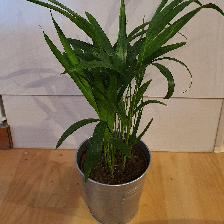

In [305]:
im3

In [306]:
# predict the image
c = c.reshape(1, 224, 224, 3)
p = m.predict(c)
pprint(decode_predictions(p, 10))

[[('n03991062', 'pot', 0.943475),
  ('n04522168', 'vase', 0.05251372),
  ('n07753275', 'pineapple', 0.0003958562),
  ('n07714990', 'broccoli', 0.00032630228),
  ('n04209239', 'shower_curtain', 0.00010447031),
  ('n03950228', 'pitcher', 9.4536634e-05),
  ('n11939491', 'daisy', 9.274898e-05),
  ('n03223299', 'doormat', 8.850643e-05),
  ('n07716358', 'zucchini', 8.560227e-05),
  ('n03903868', 'pedestal', 8.223337e-05)]]
